In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **LOAD AND ANALYSE DATA**

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/MAJOR PROJECT/TABULAR DATA/data.csv')
print(data.shape)

(867, 22)


In [ ]:
data.columns

Index(['Unnamed: 0', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score',
       'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score',
       'age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
data=data.drop(columns=['Unnamed: 0','age_desc'],axis=1)
print(data.shape)

(867, 20)


In [ ]:
data.nunique()

A1_Score            2
A2_Score            2
A3_Score            2
A4_Score            2
A5_Score            2
A6_Score            2
A7_Score            2
A8_Score            2
A9_Score            2
A10_Score           2
age                54
gender              2
ethnicity          12
jundice             2
austim              2
contry_of_res      67
used_app_before     2
result             11
relation            6
Class/ASD           2
dtype: int64

In [ ]:
# 0: Non-Autistic, 1: Autistic
data['Class/ASD'].value_counts()

NO     652
YES    215
Name: Class/ASD, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         867 non-null    int64  
 1   A2_Score         867 non-null    int64  
 2   A3_Score         867 non-null    int64  
 3   A4_Score         867 non-null    int64  
 4   A5_Score         867 non-null    int64  
 5   A6_Score         867 non-null    int64  
 6   A7_Score         867 non-null    int64  
 7   A8_Score         867 non-null    int64  
 8   A9_Score         867 non-null    int64  
 9   A10_Score        867 non-null    int64  
 10  age              865 non-null    float64
 11  gender           867 non-null    object 
 12  ethnicity        867 non-null    object 
 13  jundice          867 non-null    object 
 14  austim           867 non-null    object 
 15  contry_of_res    867 non-null    object 
 16  used_app_before  867 non-null    object 
 17  result          

In [ ]:
data.loc[0]

A1_Score                        1
A2_Score                        1
A3_Score                        1
A4_Score                        1
A5_Score                        0
A6_Score                        0
A7_Score                        1
A8_Score                        1
A9_Score                        0
A10_Score                       0
age                          26.0
gender                          f
ethnicity          White-European
jundice                        no
austim                         no
contry_of_res       United States
used_app_before                no
result                        6.0
relation                     Self
Class/ASD                      NO
Name: 0, dtype: object

In [ ]:
data = data.rename(columns={'austim': 'relative_with_ASD'})
data = data.rename(columns={'contry_of_res': 'country'})
data = data.rename(columns={'jundice': 'jaundice'})

In [ ]:
col = ['gender', 'ethnicity', 'jaundice', 'relative_with_ASD', 'country','used_app_before','relation']
for column_name in col:
    unique_values = data[column_name].unique()
    print(f'Unique values in {column_name}: {unique_values}\n')

Unique values in gender: ['f' 'm']

Unique values in ethnicity: ['White-European' 'Latino' '?' 'Others' 'Black' 'Asian' 'Middle Eastern '
 'Pasifika' 'South Asian' 'Hispanic' 'Turkish' 'others']

Unique values in jaundice: ['no' 'yes']

Unique values in relative_with_ASD: ['no' 'yes']

Unique values in country: ['United States' 'Brazil' 'Spain' 'Egypt' 'New Zealand' 'Bahamas'
 'Burundi' 'Austria' 'Argentina' 'Jordan' 'Ireland' 'United Arab Emirates'
 'Afghanistan' 'Lebanon' 'United Kingdom' 'South Africa' 'Italy'
 'Pakistan' 'Bangladesh' 'Chile' 'France' 'China' 'Australia' 'Canada'
 'Saudi Arabia' 'Netherlands' 'Romania' 'Sweden' 'Tonga' 'Oman' 'India'
 'Philippines' 'Sri Lanka' 'Sierra Leone' 'Ethiopia' 'Viet Nam' 'Iran'
 'Costa Rica' 'Germany' 'Mexico' 'Russia' 'Armenia' 'Iceland' 'Nicaragua'
 'Hong Kong' 'Japan' 'Ukraine' 'Kazakhstan' 'AmericanSamoa' 'Uruguay'
 'Serbia' 'Portugal' 'Malaysia' 'Ecuador' 'Niger' 'Belgium' 'Bolivia'
 'Aruba' 'Finland' 'Turkey' 'Nepal' 'Indonesia' 'Ango

In [ ]:
data.isnull().sum()

A1_Score             0
A2_Score             0
A3_Score             0
A4_Score             0
A5_Score             0
A6_Score             0
A7_Score             0
A8_Score             0
A9_Score             0
A10_Score            0
age                  2
gender               0
ethnicity            0
jaundice             0
relative_with_ASD    0
country              0
used_app_before      0
result               0
relation             0
Class/ASD            0
dtype: int64

In [ ]:
data.duplicated().sum()


9

In [ ]:
data.drop_duplicates(inplace=True)
print(data.shape)

(858, 20)


In [ ]:
(data.ethnicity=='?').sum()

135

In [ ]:
(data.relation =='?').sum()

102

In [ ]:
# find out how many rows have ? for both ethinicity and relation

len(data[(data.ethnicity=='?') & (data.relation=='?')])

95

In [ ]:
(data.ethnicity=='Others').sum()

34

In [ ]:
(data.ethnicity=='others').sum()

1

In [ ]:
data['ethnicity'].replace('others', 'Others', inplace=True)

In [ ]:
(data.ethnicity=='Others').sum()

35

In [ ]:
for column_name in data.columns:
    unique_values = data[column_name].unique()
    if '?' in unique_values:
        print(column_name)

ethnicity
relation


<ipython-input-42-b8c2a86735dd>:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if '?' in unique_values:


In [ ]:
data.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'relative_with_ASD', 'country',
       'used_app_before', 'result', 'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,856.000000,858.000000
mean,0.684149,0.459207,0.449883,0.472028,0.470862,0.286713,0.404429,0.622378,0.344988,0.579254,26.679907,4.773893
std,0.465125,0.498624,0.497772,0.499508,0.499441,0.452490,0.491067,0.485075,0.475642,0.493967,16.235197,2.676693
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,32.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


### **DATA VISUALISATION**

<ipython-input-25-529a73324ea8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


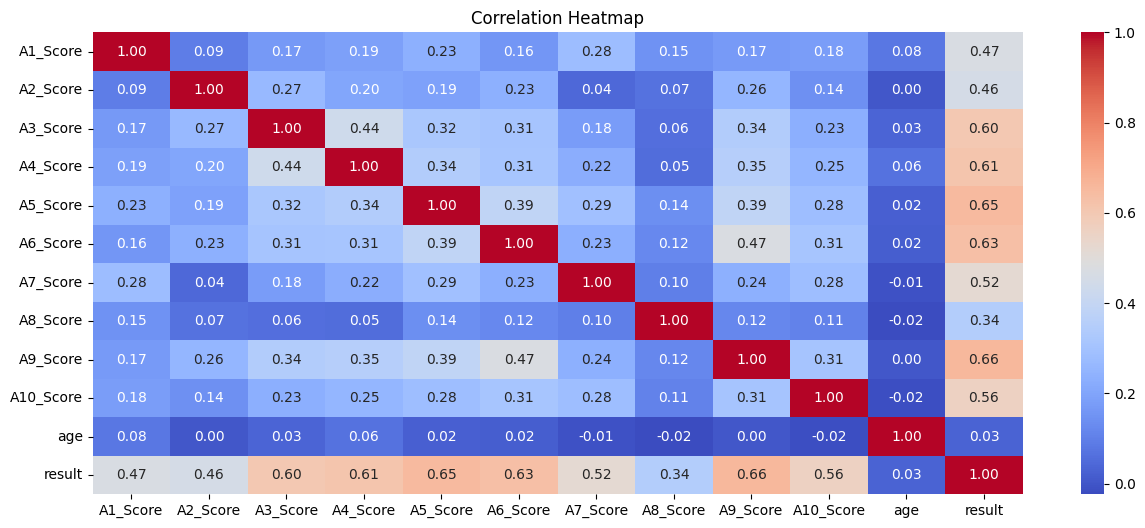

In [ ]:
plt.figure(figsize=(15, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

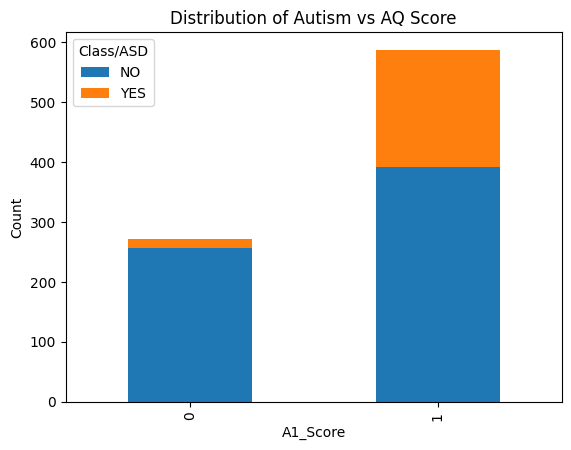

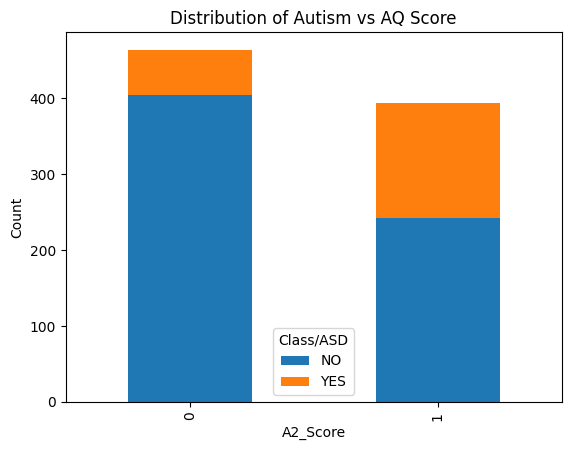

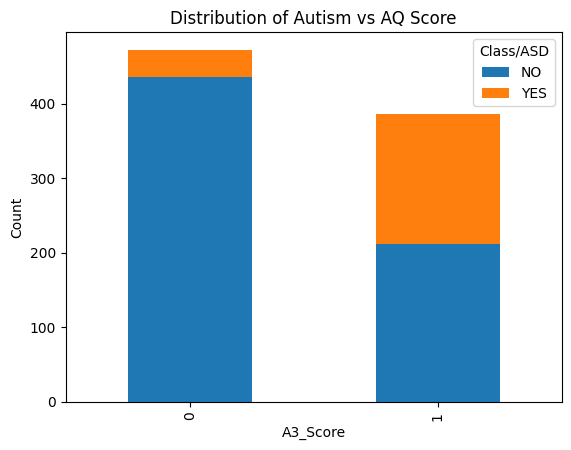

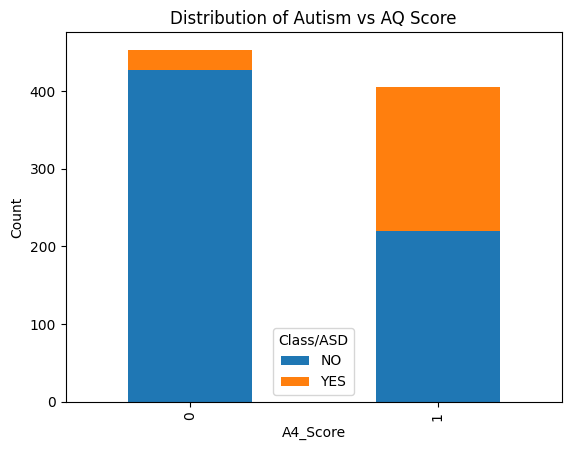

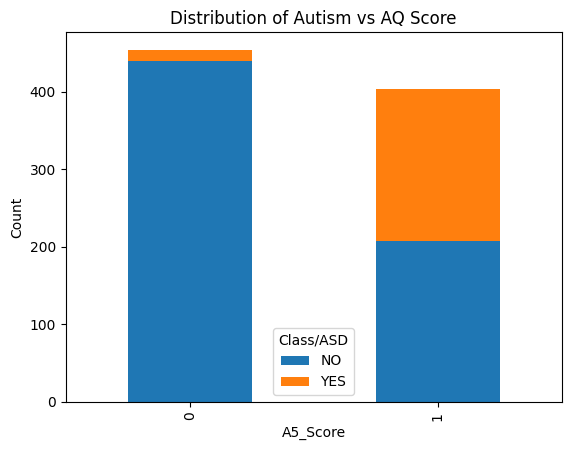

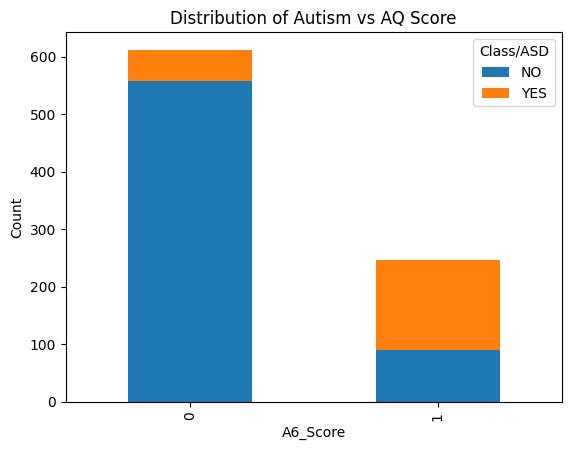

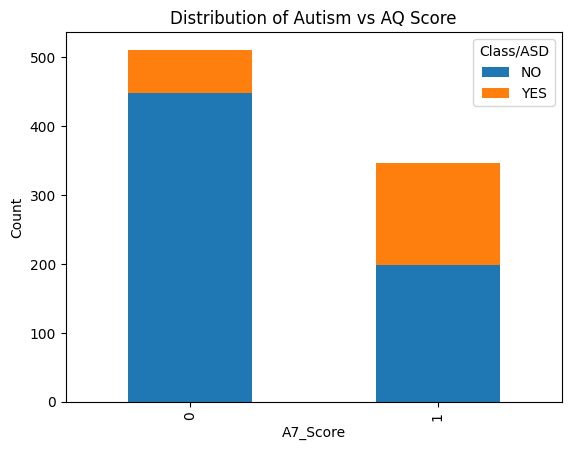

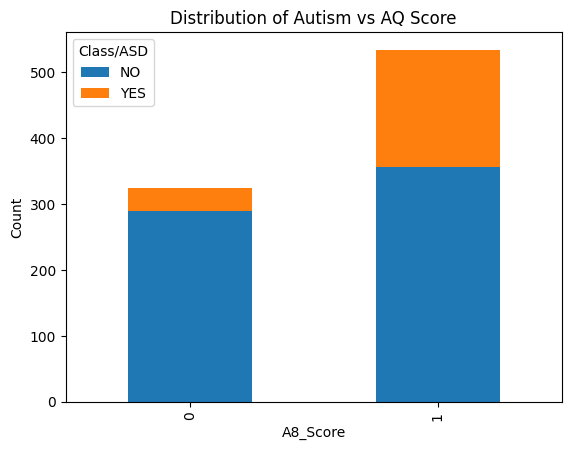

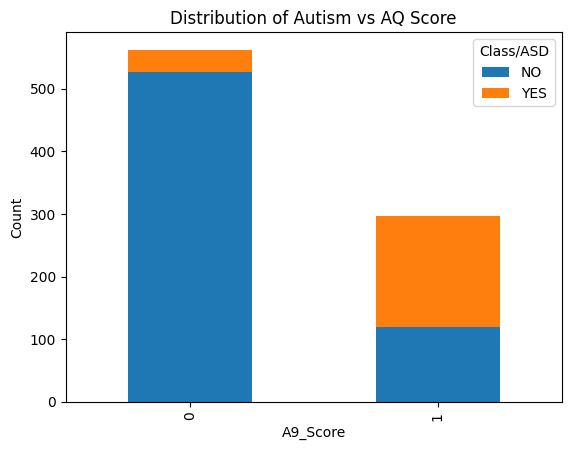

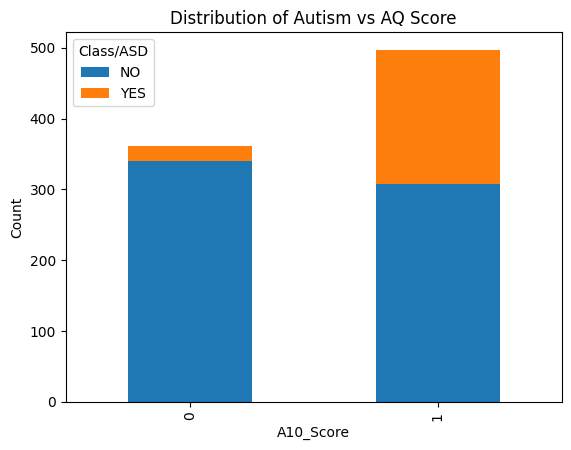

In [ ]:
AQ_values = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score','A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']
for column in AQ_values:
  AQ_class_counts = data.groupby([column, data['Class/ASD']]).size().unstack()
  AQ_class_counts.plot(kind='bar', stacked=True)
  plt.xlabel(column)
  plt.ylabel('Count')
  plt.title('Distribution of Autism vs AQ Score')
  plt.show()

Text(0.5, 1.0, 'Age Distribution')

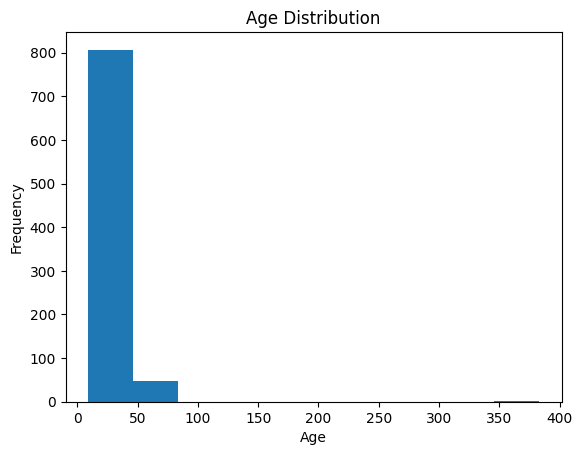

In [ ]:
data['age'].plot.hist()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

Text(0.5, 1.0, 'Result Distribution')

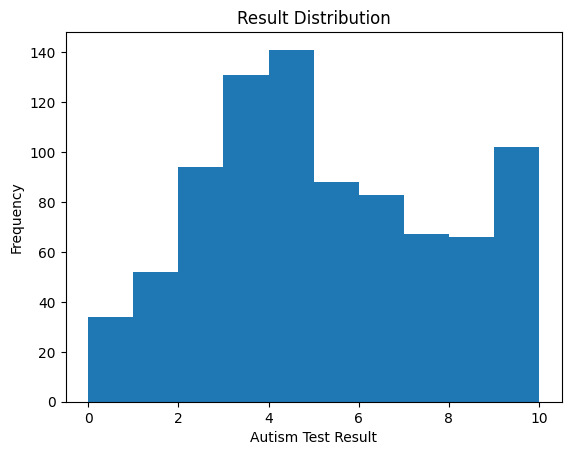

In [ ]:
data['result'].plot.hist()
plt.xlabel('Autism Test Result')
plt.ylabel('Frequency')
plt.title('Result Distribution')

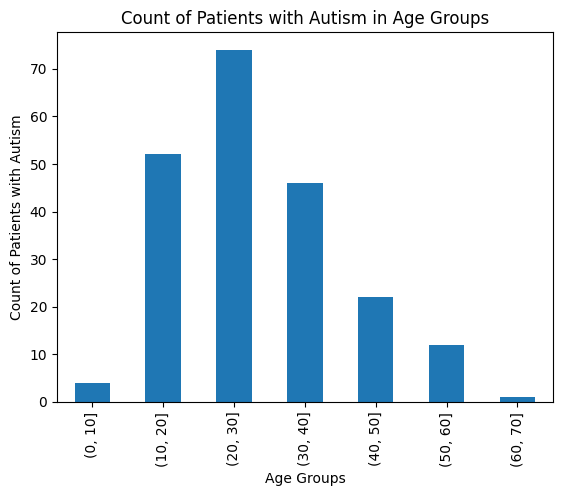

In [ ]:
### Interpretation - Most of the people diagnosed with Autism were in the age group of 20-30

age_groups = [0, 10, 20, 30, 40, 50, 60, 70]

data['Age_Group'] = pd.cut(data['age'], bins=age_groups)

# Filter the DataFrame to select rows with target class 1
class_1_data = data[data['Class/ASD'] == 'YES']

# Count the number of patients in each age group with target class 1
age_group_counts = class_1_data['Age_Group'].value_counts()
age_group_counts = age_group_counts.sort_index()
age_group_counts.plot.bar()

plt.xlabel('Age Groups')
plt.ylabel('Count of Patients with Autism')
plt.title('Count of Patients with Autism in Age Groups')

# Show the bar plot
plt.show()

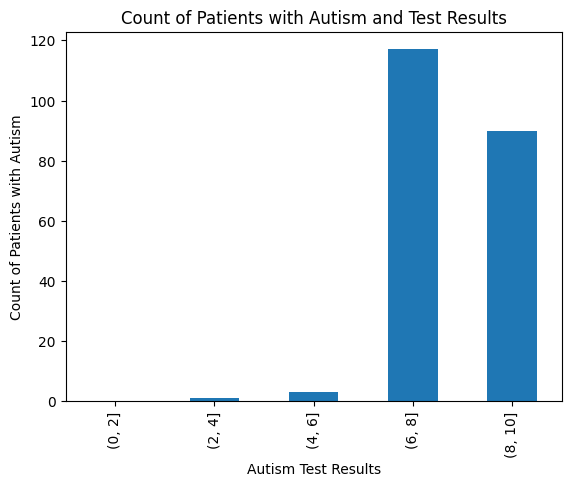

In [ ]:
### Interpretation - Most of the people diagnosed with Autism has AQ test scores between 11 to 14

autism_test_groups = [0,2,4,6,8,10]

data['autism_test_groups'] = pd.cut(data['result'], bins=autism_test_groups)

# Filter the DataFrame to select rows with target class 1
class_1_data = data[data['Class/ASD'] == 'YES']

# Count the number of patients in each age group with target class 1
age_group_counts = class_1_data['autism_test_groups'].value_counts()
age_group_counts = age_group_counts.sort_index()
age_group_counts.plot.bar()

plt.xlabel('Autism Test Results')
plt.ylabel('Count of Patients with Autism')
plt.title('Count of Patients with Autism and Test Results')

# Show the bar plot
plt.show()

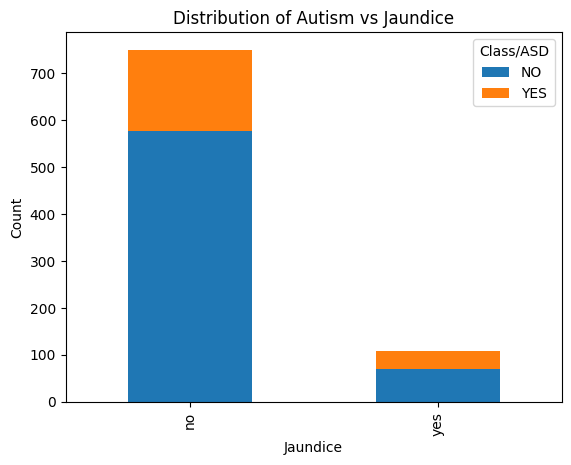

In [ ]:
### Interpretation - More number of people had Autism without having any jaundice at birth

jaundice_class_counts = data.groupby(['jaundice', 'Class/ASD']).size().unstack()

# Create a grouped bar chart
jaundice_class_counts.plot(kind='bar', stacked=True)

# Customize the plot (optional)
plt.xlabel('Jaundice')
plt.ylabel('Count')
plt.title('Distribution of Autism vs Jaundice')

# Show the grouped bar chart
plt.show()

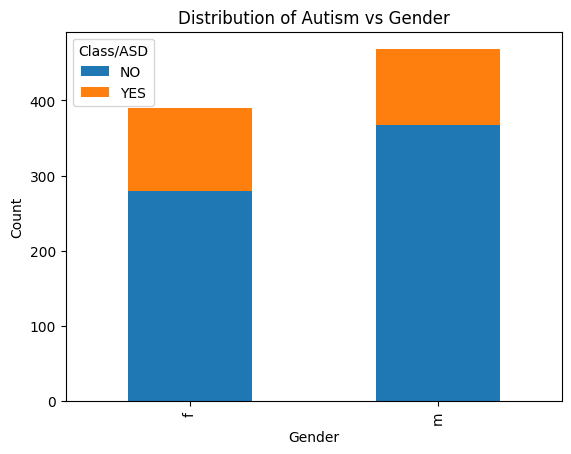

In [ ]:
### Interpretation - The number of males having Autism were more than that of females

gender_class_counts = data.groupby(['gender', 'Class/ASD']).size().unstack()

# Create a grouped bar chart
gender_class_counts.plot(kind='bar', stacked=True)

# Customize the plot (optional)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Autism vs Gender')

# Show the grouped bar chart
plt.show()

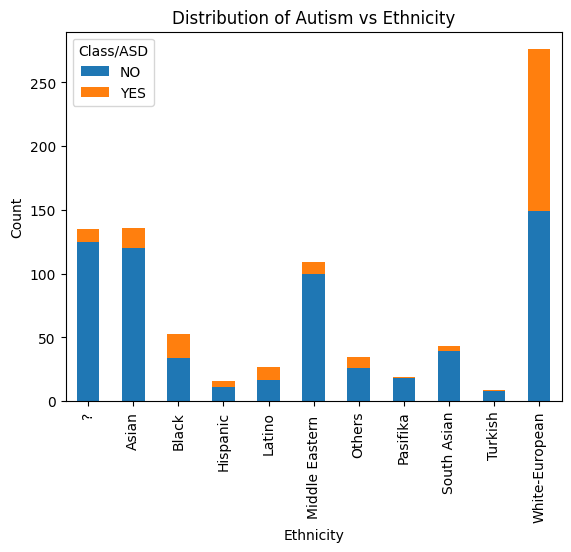

In [ ]:
### Interpretation - The number of white europeans having Autism are more in number

ethnicity_class_counts = data.groupby(['ethnicity', 'Class/ASD']).size().unstack()

# Create a grouped bar chart
ethnicity_class_counts.plot(kind='bar', stacked=True)

# Customize the plot (optional)
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.title('Distribution of Autism vs Ethnicity')

# Show the grouped bar chart
plt.show()

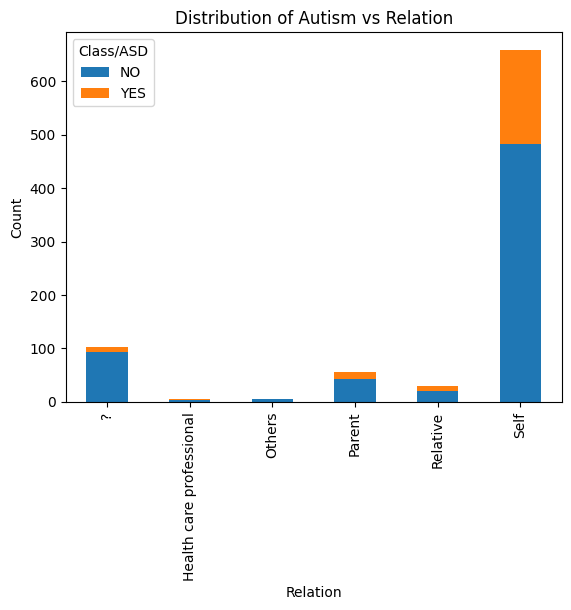

In [ ]:
### Interpretation - Most of the Autism patients themselves took the screening test

ethnicity_class_counts = data.groupby(['relation', 'Class/ASD']).size().unstack()

# Create a grouped bar chart
ethnicity_class_counts.plot(kind='bar', stacked=True)

# Customize the plot (optional)
plt.xlabel('Relation')
plt.ylabel('Count')
plt.title('Distribution of Autism vs Relation')

# Show the grouped bar chart
plt.show()

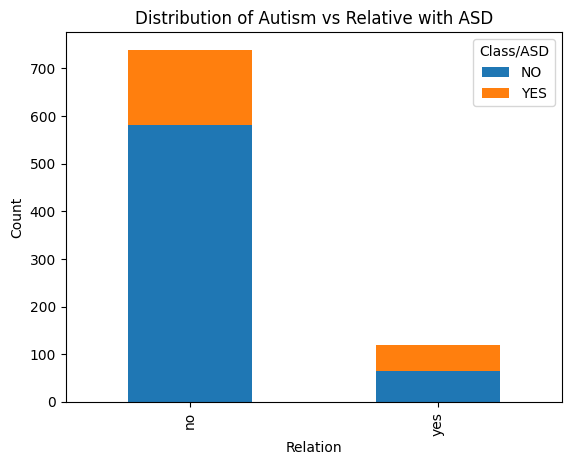

In [ ]:
### Interpretation - most people did not have any relative diagnosed with ASD

ethnicity_class_counts = data.groupby(['relative_with_ASD', 'Class/ASD']).size().unstack()

# Create a grouped bar chart
ethnicity_class_counts.plot(kind='bar', stacked=True)

# Customize the plot (optional)
plt.xlabel('Relation')
plt.ylabel('Count')
plt.title('Distribution of Autism vs Relative with ASD')

# Show the grouped bar chart
plt.show()

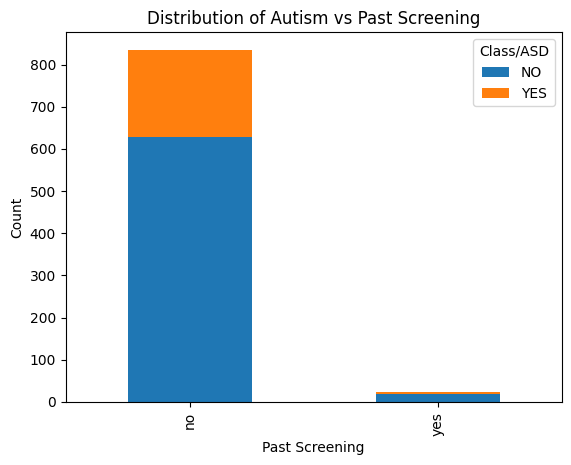

In [ ]:
### Interpretation - very few Autistic patients were diagnosed with ASD after the present screening test

ethnicity_class_counts = data.groupby(['used_app_before', 'Class/ASD']).size().unstack()

# Create a grouped bar chart
ethnicity_class_counts.plot(kind='bar', stacked=True)

# Customize the plot (optional)
plt.xlabel('Past Screening')
plt.ylabel('Count')
plt.title('Distribution of Autism vs Past Screening')

# Show the grouped bar chart
plt.show()

<Figure size 2000x600 with 0 Axes>

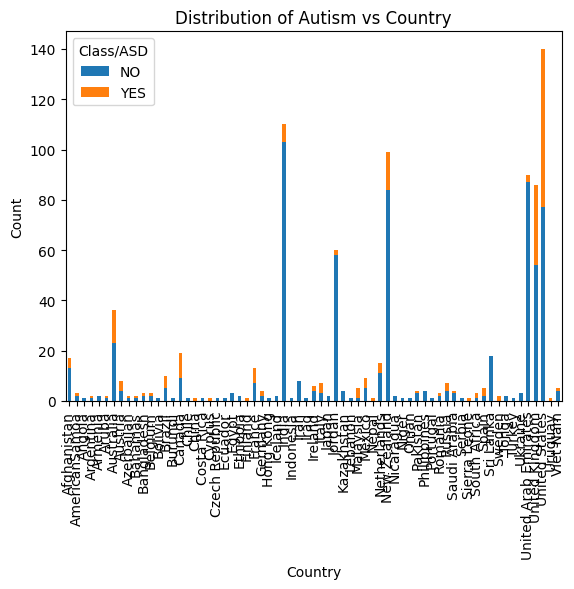

In [ ]:
### Interpretation - most people with ASD were from the US in this screening test"

plt.figure(figsize=(20, 6))
ethnicity_class_counts = data.groupby(['country', 'Class/ASD']).size().unstack()

# Create a grouped bar chart
ethnicity_class_counts.plot(kind='bar', stacked=True)

# Customize the plot (optional)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Autism vs Country')

# Show the grouped bar chart
plt.show()

### **TRAIN TEST SPLIT**

In [ ]:
data.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'relative_with_ASD', 'country',
       'used_app_before', 'result', 'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
data = data.drop(columns=['Age_Group','autism_test_groups'],axis=1)

In [ ]:
data.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'relative_with_ASD', 'country',
       'used_app_before', 'result', 'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
# X=data.drop('Class/ASD',axis=1)
# y=data['Class/ASD']
# print(X.shape,y.shape)

(858, 19) (858,)


In [ ]:
'''from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    #random_state=45,
                                                    stratify=data['Class/ASD']
                                                    )
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape) '''


(772, 19) (86, 19) (772,) (86,)


In [ ]:
'''X_train =  X_train.to_csv('/content/drive/MyDrive/MAJOR PROJECT/TABULAR DATA/X_train.csv')
X_test =  X_test.to_csv('/content/drive/MyDrive/MAJOR PROJECT/TABULAR DATA/X_test.csv')
y_train =  y_train.to_csv('/content/drive/MyDrive/MAJOR PROJECT/TABULAR DATA/y_train.csv')
y_test =  y_test.to_csv('/content/drive/MyDrive/MAJOR PROJECT/TABULAR DATA/y_test.csv')'''

In [ ]:
X_train =  pd.read_csv('/content/drive/MyDrive/MAJOR PROJECT/TABULAR DATA/X_train_new.csv')
X_test =  pd.read_csv('/content/drive/MyDrive/MAJOR PROJECT/TABULAR DATA/X_test_new.csv')

y_train =  pd.read_csv('/content/drive/MyDrive/MAJOR PROJECT/TABULAR DATA/y_train_new.csv')
y_test =  pd.read_csv('/content/drive/MyDrive/MAJOR PROJECT/TABULAR DATA/y_test_new.csv')

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(686, 20) (172, 20) (686, 2) (172, 2)


In [ ]:
X_train = X_train.drop(columns = ['Unnamed: 0'],axis=1)
X_test = X_test.drop(columns=['Unnamed: 0'],axis=1)
y_train = y_train.drop(columns = ['Unnamed: 0'],axis=1)
y_test = y_test.drop(columns=['Unnamed: 0'],axis=1)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(686, 19) (172, 19) (686, 1) (172, 1)


In [ ]:
y_train=y_train['Class/ASD']
y_test=y_test['Class/ASD']
print(y_train.shape,y_test.shape)

(686,) (172,)


## **DATA IMPUTATION**

In [ ]:
X_train=X_train.replace('?', np.nan)
X_test=X_test.replace('?', np.nan)

In [ ]:
X_train.isnull().sum()

A1_Score               0
A2_Score               0
A3_Score               0
A4_Score               0
A5_Score               0
A6_Score               0
A7_Score               0
A8_Score               0
A9_Score               0
A10_Score              0
age                    2
gender                 0
ethnicity            111
jaundice               0
relative_with_ASD      0
country                0
used_app_before        0
result                 0
relation              85
dtype: int64

In [ ]:
X_test.isnull().sum()

A1_Score              0
A2_Score              0
A3_Score              0
A4_Score              0
A5_Score              0
A6_Score              0
A7_Score              0
A8_Score              0
A9_Score              0
A10_Score             0
age                   0
gender                0
ethnicity            24
jaundice              0
relative_with_ASD     0
country               0
used_app_before       0
result                0
relation             17
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Encode categorical values using LabelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()

train_eth_le = le1.fit_transform(X_train['ethnicity'].astype(str))
test_eth_le = le1.transform(X_test['ethnicity'].astype(str))
print(le1.classes_)

train_rel_le = le2.fit_transform(X_train['relation'].astype(str))
test_rel_le = le2.transform(X_test['relation'].astype(str))
print(le2.classes_)

# Initialize the KNNImputer with the number of neighbors you want to consider (e.g., 3)
knn_imputer = KNNImputer(n_neighbors=3)

# Perform KNN imputation on the specified columns for training data
X_train['ethnicity'] = knn_imputer.fit_transform(train_eth_le.reshape(-1,1))
X_train['relation'] = knn_imputer.fit_transform(train_rel_le.reshape(-1,1))
X_train['age'] = knn_imputer.fit_transform(X_train['age'].values.reshape(-1,1))

# Perform KNN imputation on the specified columns for test data
X_test['ethnicity'] = knn_imputer.transform(test_eth_le.reshape(-1,1))
X_test['relation'] = knn_imputer.transform(test_rel_le.reshape(-1,1))

# X_test['age'] = knn_imputer.transform(X_test['age'].values.reshape(-1,1)) # no null values of age in test

['Asian' 'Black' 'Hispanic' 'Latino' 'Middle Eastern ' 'Others' 'Pasifika'
 'South Asian' 'Turkish' 'White-European' 'nan']
['Health care professional' 'Others' 'Parent' 'Relative' 'Self' 'nan']


In [ ]:
X_train.isnull().sum()

A1_Score             0
A2_Score             0
A3_Score             0
A4_Score             0
A5_Score             0
A6_Score             0
A7_Score             0
A8_Score             0
A9_Score             0
A10_Score            0
age                  0
gender               0
ethnicity            0
jaundice             0
relative_with_ASD    0
country              0
used_app_before      0
result               0
relation             0
dtype: int64

In [ ]:
X_test.isnull().sum()

A1_Score             0
A2_Score             0
A3_Score             0
A4_Score             0
A5_Score             0
A6_Score             0
A7_Score             0
A8_Score             0
A9_Score             0
A10_Score            0
age                  0
gender               0
ethnicity            0
jaundice             0
relative_with_ASD    0
country              0
used_app_before      0
result               0
relation             0
dtype: int64

### **OUTLIER DETECTION**

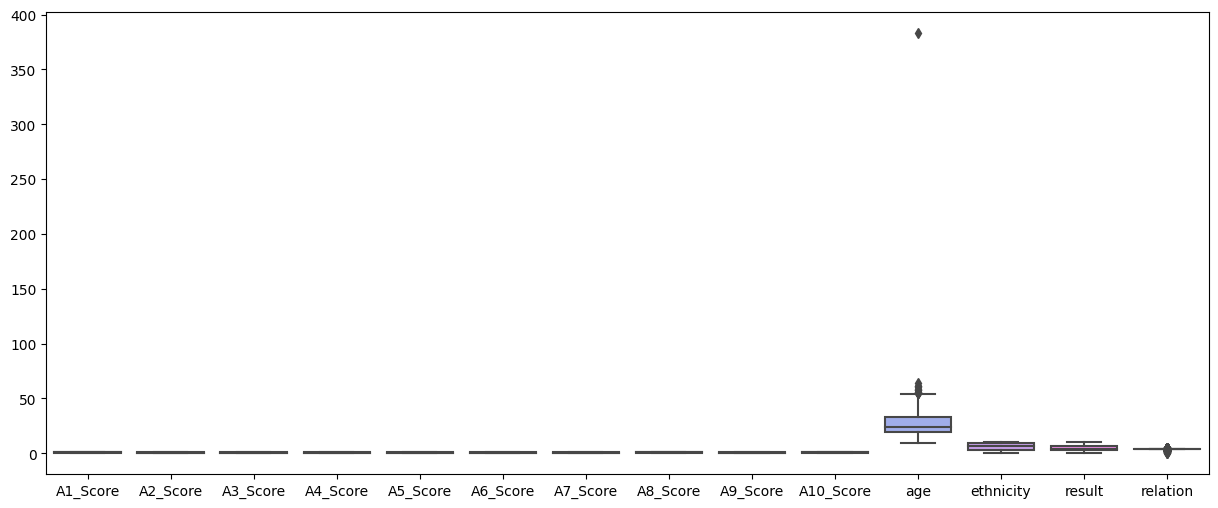

In [ ]:
# Create a figure with subplots
plt.figure(figsize=(15, 6))
sns.boxplot(data=X_train)
plt.show()

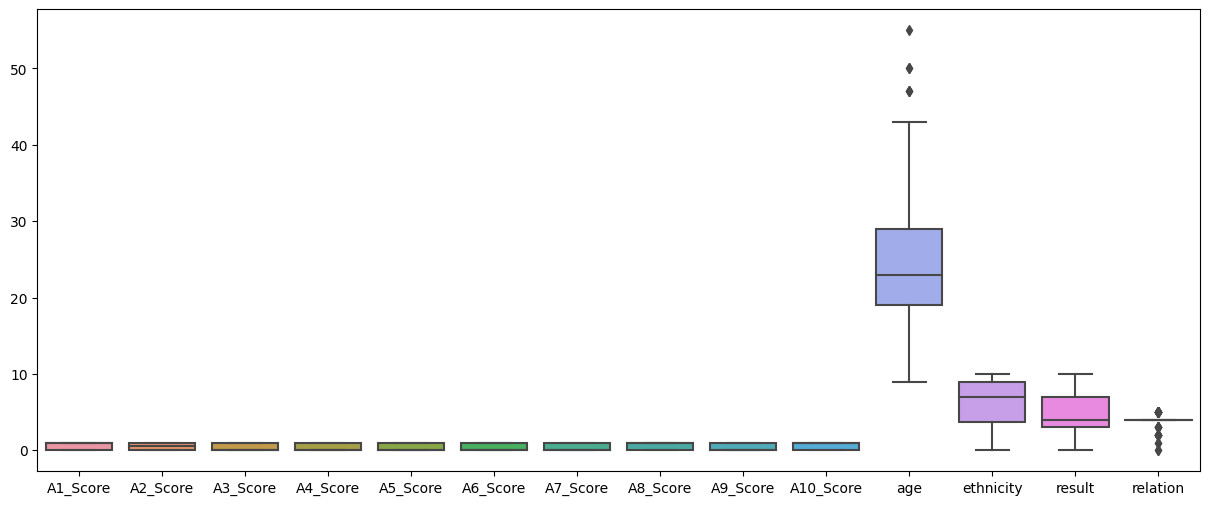

In [ ]:
# Create a figure with subplots
plt.figure(figsize=(15, 6))
sns.boxplot(data=X_test)
plt.show()

In [ ]:
index_to_drop = X_train[X_train['age'] == 383].index

X_train = X_train.drop(index_to_drop)
y_train = y_train.drop(index_to_drop)
print(X_train.shape,y_train.shape)

(685, 19) (685,)


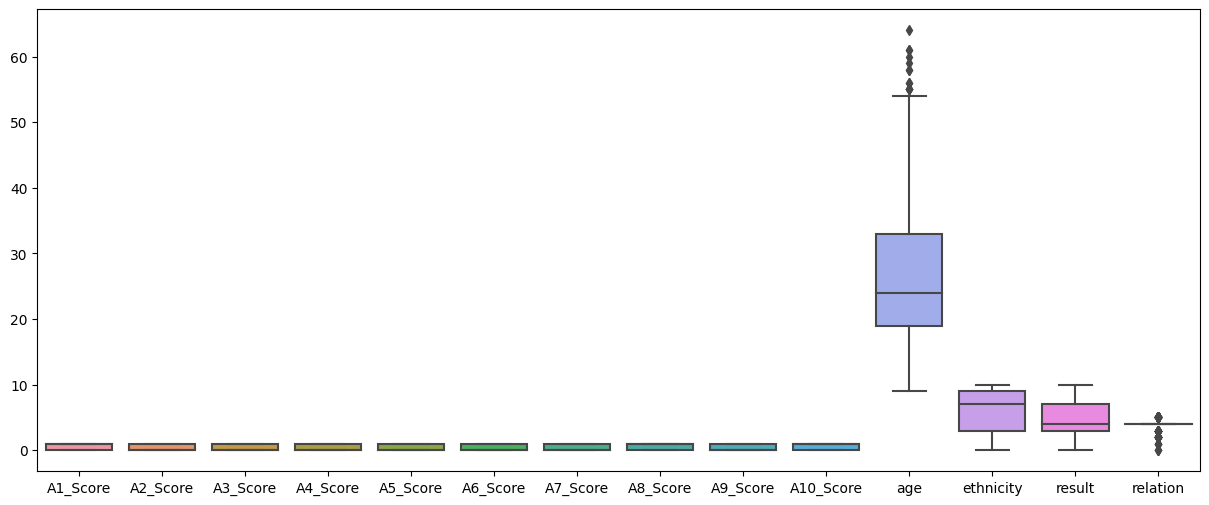

In [ ]:
# Create a figure with subplots
plt.figure(figsize=(15, 6))
sns.boxplot(data=X_train)
plt.show()

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(685, 19) (172, 19) (685,) (172,)


### ENCODING CATEGORICAL VARIABLES

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 685
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   A1_Score           685 non-null    int64  
 1   A2_Score           685 non-null    int64  
 2   A3_Score           685 non-null    int64  
 3   A4_Score           685 non-null    int64  
 4   A5_Score           685 non-null    int64  
 5   A6_Score           685 non-null    int64  
 6   A7_Score           685 non-null    int64  
 7   A8_Score           685 non-null    int64  
 8   A9_Score           685 non-null    int64  
 9   A10_Score          685 non-null    int64  
 10  age                685 non-null    float64
 11  gender             685 non-null    object 
 12  ethnicity          685 non-null    float64
 13  jaundice           685 non-null    object 
 14  relative_with_ASD  685 non-null    object 
 15  country            685 non-null    object 
 16  used_app_before    685 non

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize the OrdinalEncoder
oe = OrdinalEncoder()
encoded_data = oe.fit_transform(data[['gender','jaundice', 'relative_with_ASD', 'country','used_app_before']])
encoded_data_train = oe.transform(X_train[['gender','jaundice', 'relative_with_ASD', 'country','used_app_before']])
encoded_data_test = oe.transform(X_test[['gender','jaundice', 'relative_with_ASD', 'country','used_app_before']])

# Replace the original columns with the encoded values
X_train[['gender','jaundice', 'relative_with_ASD', 'country','used_app_before']] = encoded_data_train
X_test[['gender','jaundice', 'relative_with_ASD', 'country','used_app_before']] = encoded_data_test

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 685
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   A1_Score           685 non-null    int64  
 1   A2_Score           685 non-null    int64  
 2   A3_Score           685 non-null    int64  
 3   A4_Score           685 non-null    int64  
 4   A5_Score           685 non-null    int64  
 5   A6_Score           685 non-null    int64  
 6   A7_Score           685 non-null    int64  
 7   A8_Score           685 non-null    int64  
 8   A9_Score           685 non-null    int64  
 9   A10_Score          685 non-null    int64  
 10  age                685 non-null    float64
 11  gender             685 non-null    float64
 12  ethnicity          685 non-null    float64
 13  jaundice           685 non-null    float64
 14  relative_with_ASD  685 non-null    float64
 15  country            685 non-null    float64
 16  used_app_before    685 non

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   A1_Score           172 non-null    int64  
 1   A2_Score           172 non-null    int64  
 2   A3_Score           172 non-null    int64  
 3   A4_Score           172 non-null    int64  
 4   A5_Score           172 non-null    int64  
 5   A6_Score           172 non-null    int64  
 6   A7_Score           172 non-null    int64  
 7   A8_Score           172 non-null    int64  
 8   A9_Score           172 non-null    int64  
 9   A10_Score          172 non-null    int64  
 10  age                172 non-null    float64
 11  gender             172 non-null    float64
 12  ethnicity          172 non-null    float64
 13  jaundice           172 non-null    float64
 14  relative_with_ASD  172 non-null    float64
 15  country            172 non-null    float64
 16  used_app_before    172 non

### **DATA SCALING**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler(feature_range=(0,1))
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.transform(X_test)
print(X_train_scaled.shape,X_test_scaled.shape)

(685, 19) (172, 19)


#### ENCODING THE TARGET VARIABLE

In [ ]:
# encoding the label

le=LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
le.classes_

array([0, 1])

### **MODEL BUILDING**

## LGBM - Best Model

In [ ]:
!pip install flaml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.2/295.2 kB 5.9 MB/s eta 0:00:00


In [ ]:
# flaml- AutoML

# Auto ML : Fast and Light Auto ML FLAML (Microsoft)
from flaml import AutoML
automl = AutoML()
automl.fit(X_train_scaled,y_train,time_budget= 1000,
           metric = 'f1',
           task = 'classification',eval_method='cv',
           #ensemble=True,
           sample_weight_val = 'balanced',
           estimator_list=['lgbm'],
           n_splits=10,
           split_type='stratified' # 'uniform','stratified'
         )
best_model = automl.model #best model

Streaming output truncated to the last 5000 lines.
[flaml.automl.logger: 10-15 11:01:15] {2218} INFO - iteration 5445, current learner lgbm
[flaml.automl.logger: 10-15 11:01:15] {2391} INFO -  at 685.2s,	estimator lgbm's best error=0.0348,	best estimator lgbm's best error=0.0348
[flaml.automl.logger: 10-15 11:01:15] {2218} INFO - iteration 5446, current learner lgbm
[flaml.automl.logger: 10-15 11:01:16] {2391} INFO -  at 685.3s,	estimator lgbm's best error=0.0348,	best estimator lgbm's best error=0.0348
[flaml.automl.logger: 10-15 11:01:16] {2218} INFO - iteration 5447, current learner lgbm
[flaml.automl.logger: 10-15 11:01:16] {2391} INFO -  at 685.4s,	estimator lgbm's best error=0.0348,	best estimator lgbm's best error=0.0348
[flaml.automl.logger: 10-15 11:01:16] {2218} INFO - iteration 5448, current learner lgbm
[flaml.automl.logger: 10-15 11:01:16] {2391} INFO -  at 685.5s,	estimator lgbm's best error=0.0348,	best estimator lgbm's best error=0.0348
[flaml.automl.logger: 10-15 11:01

In [ ]:
best_model.estimator

LGBMClassifier(colsample_bytree=0.46658561978196406,
               learning_rate=0.6824771049317797, max_bin=31,
               min_child_samples=21, n_estimators=1, n_jobs=-1, num_leaves=5,
               reg_alpha=0.0014879616029236083, reg_lambda=0.2643126827048801,
               verbose=-1)

In [ ]:
automl.best_config

{'n_estimators': 7,
 'num_leaves': 5,
 'min_child_samples': 21,
 'learning_rate': 0.6824771049317797,
 'log_max_bin': 5,
 'colsample_bytree': 0.46658561978196406,
 'reg_alpha': 0.0014879616029236083,
 'reg_lambda': 0.2643126827048801}

In [ ]:
print(automl.best_loss)

0.03482896188778541


<BarContainer object of 19 artists>

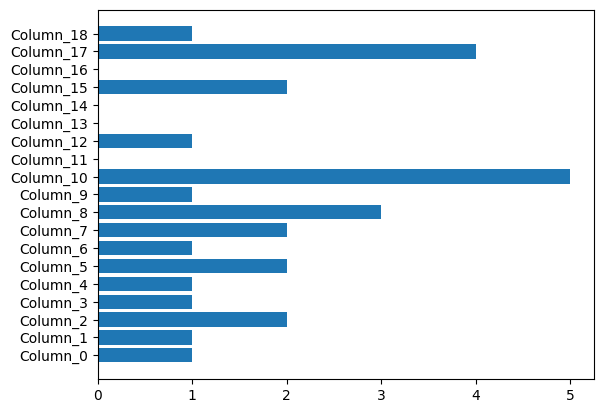

In [ ]:
plt.barh(best_model.estimator.feature_name_, best_model.estimator.feature_importances_)

In [ ]:
import pickle

In [ ]:
pickle.dump(best_model,open('/content/drive/MyDrive/MAJOR PROJECT/TABULAR DATA/best_model_lgbm.pkl','wb'))

In [ ]:
dt_model = pickle.load(open('/content/drive/MyDrive/MAJOR PROJECT/TABULAR DATA/best_model_lgbm.pkl','rb'))

In [ ]:
y_pred_dt = dt_model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_dt)

0.9883720930232558

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_dt)
print(cm)

[[128   2]
 [  0  42]]


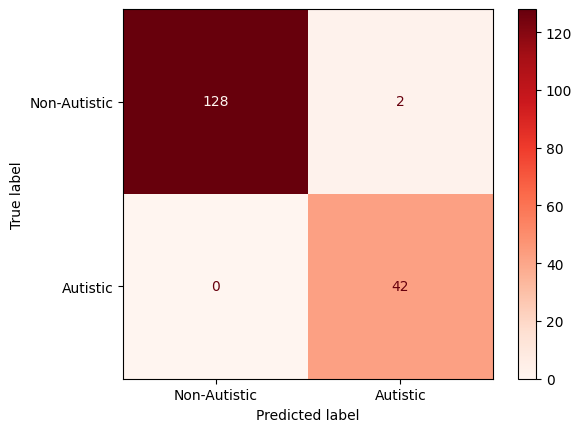

In [ ]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Non-Autistic', 'Autistic'])
cm_display.plot(cmap='Reds')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_dt)
print(cr) #

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       130
           1       0.95      1.00      0.98        42

    accuracy                           0.99       172
   macro avg       0.98      0.99      0.98       172
weighted avg       0.99      0.99      0.99       172



In [ ]:
# from sklearn.metrics import roc_curve
# from sklearn.metrics import roc_auc_score




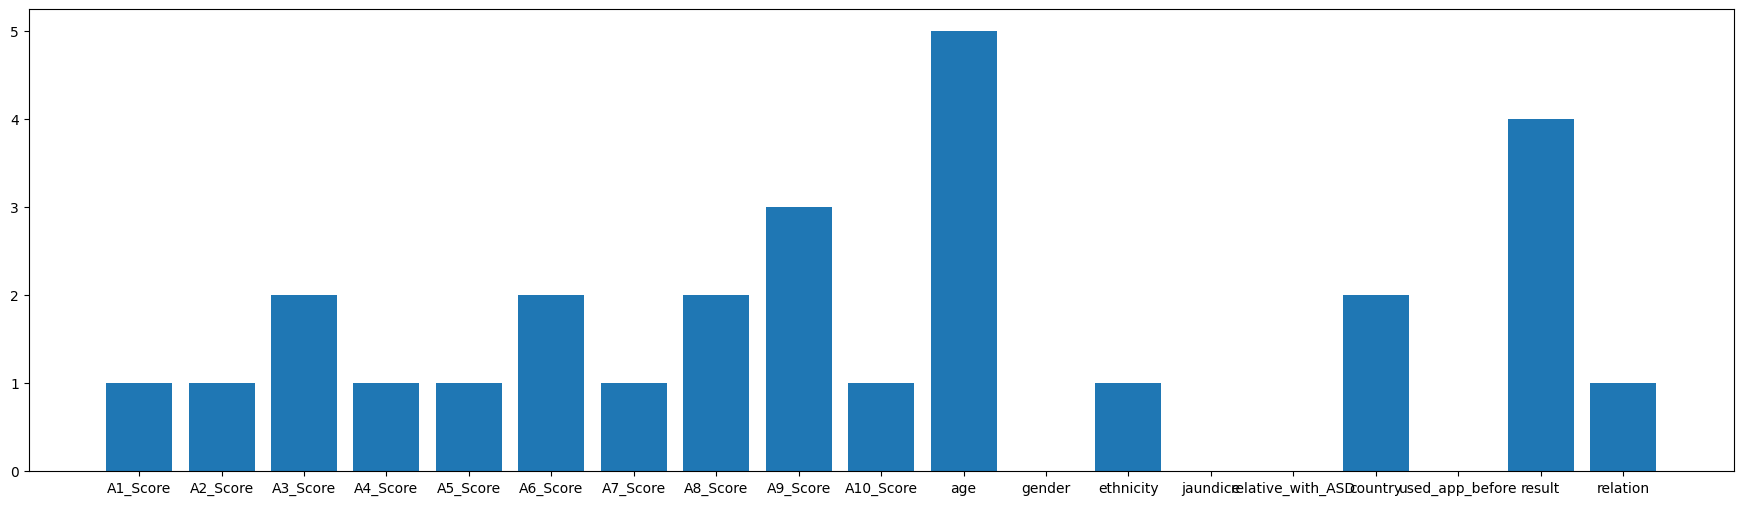

In [ ]:
scores = dt_model.feature_importances_
plt.figure(figsize=(22,6))
plt.bar(X_train.columns,scores)
plt.show()

### SVM CLASSIFIER

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_scaled,y_train)

SVC()

In [ ]:
y_pred_svc = svc.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_svc)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       130
           1       0.93      0.88      0.90        42

    accuracy                           0.95       172
   macro avg       0.94      0.93      0.94       172
weighted avg       0.95      0.95      0.95       172



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_svc)
print(cm)

[[127   3]
 [  5  37]]


### DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()
dtc.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dtc= dtc.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_dtc)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       130
           1       0.93      0.95      0.94        42

    accuracy                           0.97       172
   macro avg       0.96      0.96      0.96       172
weighted avg       0.97      0.97      0.97       172



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_dtc)
print(cm)

[[127   3]
 [  2  40]]


### LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)

LogisticRegression()

In [ ]:
y_pred_lr = lr.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_lr)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       130
           1       0.95      0.83      0.89        42

    accuracy                           0.95       172
   macro avg       0.95      0.91      0.93       172
weighted avg       0.95      0.95      0.95       172



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_lr)
print(cm)

[[128   2]
 [  7  35]]


### SGD

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train_scaled,y_train)

SGDClassifier()

In [ ]:
y_pred_sgd = sgd.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_sgd)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       130
           1       0.97      0.83      0.90        42

    accuracy                           0.95       172
   macro avg       0.96      0.91      0.93       172
weighted avg       0.95      0.95      0.95       172



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_sgd)
print(cm)

[[129   1]
 [  7  35]]


### MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp= MLPClassifier()
mlp.fit(X_train_scaled,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [ ]:
y_pred_mlp = mlp.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_mlp)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       130
           1       0.92      0.86      0.89        42

    accuracy                           0.95       172
   macro avg       0.94      0.92      0.93       172
weighted avg       0.95      0.95      0.95       172



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_mlp)
print(cm)

[[127   3]
 [  6  36]]


### GBC Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_scaled,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred_gbc = gbc.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_gbc)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       130
           1       0.95      0.93      0.94        42

    accuracy                           0.97       172
   macro avg       0.96      0.96      0.96       172
weighted avg       0.97      0.97      0.97       172



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_gbc)
print(cm)

[[128   2]
 [  3  39]]


### AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adc = AdaBoostClassifier()
adc.fit(X_train_scaled,y_train)

AdaBoostClassifier()

In [ ]:
y_pred_adc = adc.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_adc)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       130
           1       0.97      0.93      0.95        42

    accuracy                           0.98       172
   macro avg       0.98      0.96      0.97       172
weighted avg       0.98      0.98      0.98       172



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_adc)
print(cm)

[[129   1]
 [  3  39]]


### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [ ]:
y_pred_rfc = rfc.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_rfc)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       130
           1       0.93      1.00      0.97        42

    accuracy                           0.98       172
   macro avg       0.97      0.99      0.98       172
weighted avg       0.98      0.98      0.98       172



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_rfc)
print(cm)

[[127   3]
 [  0  42]]


### Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled,y_train)

GaussianNB()

In [ ]:
y_pred_gnb = gnb.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_gnb)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       130
           1       0.87      0.93      0.90        42

    accuracy                           0.95       172
   macro avg       0.92      0.94      0.93       172
weighted avg       0.95      0.95      0.95       172



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_gnb)
print(cm)

[[124   6]
 [  3  39]]
